# Dimensions Reduction 

✅ Dimensionality reduction complete
Explained variance ratio (first 5): [0.6182466  0.15818879 0.061926   0.03109432 0.01729102]


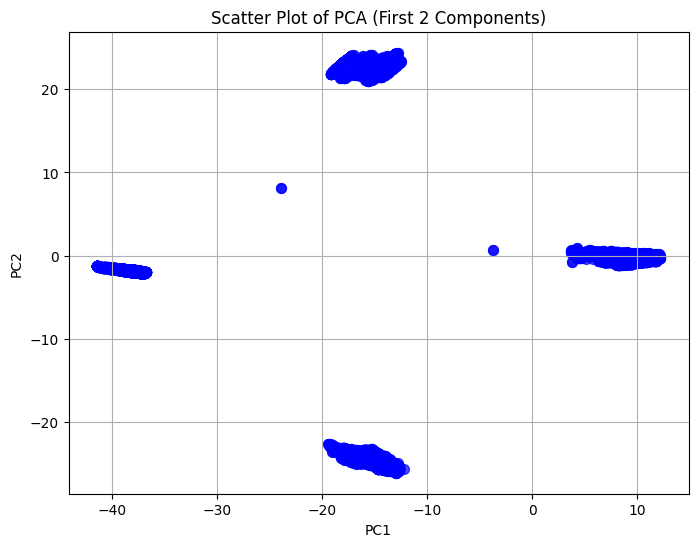

In [ ]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import RobustScaler
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt

# -------------------------------
#  Load feature engineered dataset
# -------------------------------
df = pd.read_csv("df_features.csv")

# -------------------------------
# Select numeric columns
# -------------------------------
num_df = df.select_dtypes(include='number')

# -------------------------------
# Replace inf/-inf with NaN
# -------------------------------
num_df = num_df.replace([np.inf, -np.inf], np.nan)

# -------------------------------
# Fill NaNs with column median (robust to outliers)
# -------------------------------
num_df = num_df.fillna(num_df.median())

# -------------------------------
# Optional: Clip extreme outliers (1st and 99th percentiles)
# -------------------------------
for col in num_df.columns:
    lower = num_df[col].quantile(0.01)
    upper = num_df[col].quantile(0.99)
    num_df[col] = num_df[col].clip(lower, upper)

# -------------------------------
# Convert to float32 to avoid float64 overflow
# -------------------------------
X = num_df.astype('float32').values

# -------------------------------
# Scaling
# -------------------------------
scaler = RobustScaler()
X_scaled = scaler.fit_transform(X)

# -------------------------------
# PCA Dimensionality Reduction
# -------------------------------
pca = PCA(n_components=20, random_state=42)
X_reduced = pca.fit_transform(X_scaled)

# Save PCA features
pd.DataFrame(X_reduced).to_csv("df_pca.csv", index=False)

print("✅ Dimensionality reduction complete")
print("Explained variance ratio (first 5):", pca.explained_variance_ratio_[:5])

# -------------------------------
# Scatter plot of first 2 PCA components
# -------------------------------
plt.figure(figsize=(8,6))
plt.scatter(X_reduced[:,0], X_reduced[:,1], s=50, alpha=0.7, c='blue')
plt.title("Scatter Plot of PCA (First 2 Components)")
plt.xlabel("PC1")
plt.ylabel("PC2")
plt.grid(True)
plt.show()
